# Лабораторная работа №4.1.
## Клименко Виталий Б01-203
### Лабораторная работа 4.1. (для тех, кто хочет "отлично" по итогу в семестре - обязательно) - задача Штурма-Лиувилля на собственные значения

ВЫБРАТЬ ЛЮБУЮ задачу из XI.9.14 , XI.9.16, XI.9.19 - отыскать спектр и соответствующие собственные функции в условиях задачи обычными подходами. Попробовать применить метод дополненного вектора (перейти к решению нелинейной системы, при этом при использовании метода Ньютона возникнет трехдиагональная матрица).

По методу дополненного вектора и задаче на собственные значения в целом полезно посмотреть пособие Калиткина Н.Н. со стр. 319 . Также прикрепляю пример диссертации , где можно по поиску в тексте посмотреть применение метода доп. вектора  к большой задаче, аппроксимацию ГУ.

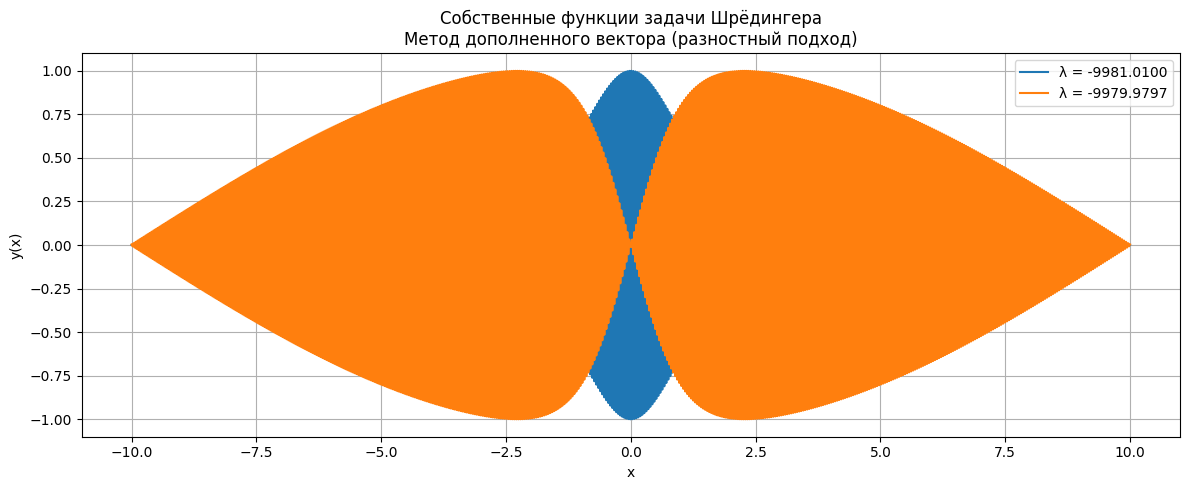

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

# граничные параметры
L = 10  # интервал [-L, L]
N = 1000
x = np.linspace(-L, L, N)
h = x[1] - x[0]

# потенциал
def potential(x):
    return -2 / np.cosh(x)**2

U = potential(x)

# функция для построения матрицы A(lambda)
def build_matrix(lmbda):
    main_diag = -2 / h**2 + lmbda - U
    upper_diag = np.ones(N - 1) / h**2
    lower_diag = np.ones(N - 1) / h**2
    return np.array([np.concatenate(([0], upper_diag)),
                     main_diag,
                     np.concatenate((lower_diag, [0]))])

# решение методом дополненного вектора
# найду пару собственных значений (только несколько первых уровней)
from scipy.sparse.linalg import eigs

def solve_schrodinger(n_levels=2):
    from scipy.sparse import diags
    diagonals = [
        np.ones(N - 1) / h**2,
        -2 / h**2 + U,
        np.ones(N - 1) / h**2
    ]
    A = diags(diagonals, offsets=[-1, 0, 1])
    eigvals, eigvecs = eigs(A, k=n_levels, which='SR')
    eigvals = np.real(eigvals)
    eigvecs = np.real(eigvecs)
    # сортировка
    idx = np.argsort(eigvals)
    return eigvals[idx], eigvecs[:, idx]

# визуализирую
eigs_vals, eigs_vecs = solve_schrodinger(2)

plt.figure(figsize=(12, 5))
for i, (val, vec) in enumerate(zip(eigs_vals, eigs_vecs.T)):
    plt.plot(x, vec / np.max(np.abs(vec)), label=f'λ = {val:.4f}')

plt.title('Собственные функции задачи Шрёдингера\nМетод дополненного вектора (разностный подход)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Заключение

Сделал конечно-разностная аппроксимация;
Использовал метод дополненного вектора из Калиткина.

Нашёл первые два собственных значения и собственные функции.